In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
import warnings
%matplotlib inline
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
sns.set(style='white', context='notebook', palette='deep')


## Data Preparation

In [94]:
# Load Data
train = pd.read_csv("./train.csv")
test  = pd.read_csv("./test.csv")

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

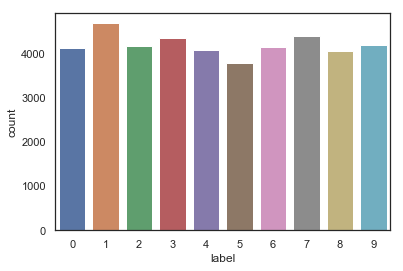

In [95]:
# Create Label
y_train = train['label']

# Remove label from train df
X_train = train.drop("label", axis=1)
g = sns.countplot(y_train)
y_train.value_counts()

In [96]:
print(X_train.isnull().any().describe())
print()
print(test.isnull().any().describe())

count       784
unique        1
top       False
freq        784
dtype: object

count       784
unique        1
top       False
freq        784
dtype: object


## Normalization


In [97]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB


In [98]:
X_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [99]:
X_train.shape

(42000, 784)

In [100]:
# Normalization
X_train = X_train / 255.0
test = test / 255.0

In [101]:
# Reshape
X_train = X_train.values.reshape(-1, 28,28,1)
test = test.values.reshape(-1, 28,28,1)

Train and test images (28px x 28px) has been stock into pandas.Dataframe as 1D vectors of 784 values. We reshape all data to 28x28x1 3D matrices.

Keras requires an extra dimension in the end which correspond to channels. MNIST images are gray scaled so it use only one channel. For RGB images, there is 3 channels, we would have reshaped 784px vectors to 28x28x3 3D matrices.

In [102]:
# Either Way works
ytrain = pd.get_dummies(y_train)
y_train = to_categorical(y_train,num_classes=10)

In [103]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [104]:
ytrain.values

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [105]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

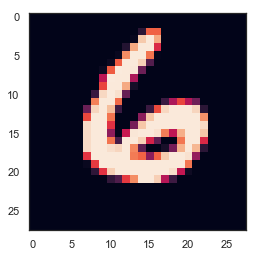

In [106]:
a =plt.imshow(X_train[110][:,:,0])

## Model

In [109]:
model = Sequential()
model.add(Conv2D(filters= 32, kernel_size= (5,5), padding= 'Same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters= 32, kernel_size= (5,5), padding= 'Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters= 64, kernel_size= (3,3), padding= 'Same', activation='relu'))
model.add(Conv2D(filters= 64, kernel_size= (3,3), padding= 'Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


## Optimizer

In [110]:
optimizer = RMSprop(lr= 0.001, rho= 0.9, epsilon= 1e-08, decay= 0.0)

In [111]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [112]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr = 0.00001)

In [113]:
epochs = 15
batch_size = 86

In [58]:
history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, 
         validation_data = (X_val, y_val), verbose = 2)

Train on 30618 samples, validate on 3402 samples
Epoch 1/10
 - 213s - loss: 0.7669 - acc: 0.7360 - val_loss: 0.1434 - val_acc: 0.9541
Epoch 2/10
 - 215s - loss: 0.1667 - acc: 0.9492 - val_loss: 0.0912 - val_acc: 0.9700
Epoch 3/10
 - 219s - loss: 0.1094 - acc: 0.9668 - val_loss: 0.0739 - val_acc: 0.9759
Epoch 4/10
 - 213s - loss: 0.0865 - acc: 0.9740 - val_loss: 0.0713 - val_acc: 0.9780
Epoch 5/10
 - 208s - loss: 0.0747 - acc: 0.9772 - val_loss: 0.0586 - val_acc: 0.9800
Epoch 6/10
 - 208s - loss: 0.0658 - acc: 0.9799 - val_loss: 0.0566 - val_acc: 0.9812
Epoch 7/10
 - 208s - loss: 0.0590 - acc: 0.9817 - val_loss: 0.0610 - val_acc: 0.9827
Epoch 8/10
 - 209s - loss: 0.0539 - acc: 0.9833 - val_loss: 0.0545 - val_acc: 0.9847
Epoch 9/10
 - 209s - loss: 0.0528 - acc: 0.9839 - val_loss: 0.0545 - val_acc: 0.9827
Epoch 10/10
 - 208s - loss: 0.0485 - acc: 0.9854 - val_loss: 0.0472 - val_acc: 0.9844


## Evaluate the model

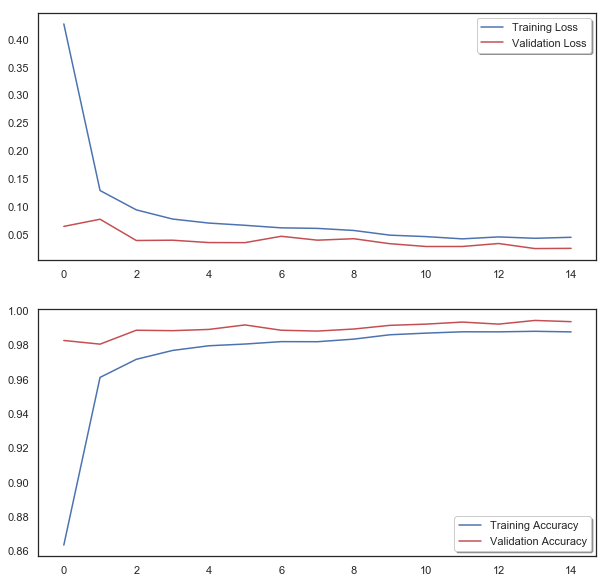

In [116]:


fig, ax = plt.subplots(2,1, figsize=(10,10))
ax[0].plot(history.history['loss'], color='b',label='Training Loss')
ax[0].plot(history.history['val_loss'], color='r', label='Validation Loss', axes=ax[0])
legend = ax[0].legend(loc='best', shadow =True)

ax[1].plot(history.history['acc'],color='b', label='Training Accuracy')
ax[1].plot(history.history['val_acc'],color='r', label='Validation Accuracy')
legend = ax[1].legend(loc='best', shadow =True)



## Confusion Matrix

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3402 entries, 37660 to 25972
Data columns (total 10 columns):
0    3402 non-null uint8
1    3402 non-null uint8
2    3402 non-null uint8
3    3402 non-null uint8
4    3402 non-null uint8
5    3402 non-null uint8
6    3402 non-null uint8
7    3402 non-null uint8
8    3402 non-null uint8
9    3402 non-null uint8
dtypes: uint8(10)
memory usage: 59.8 KB


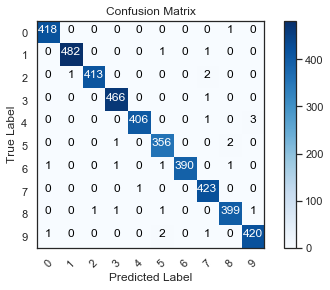

In [120]:
def plot_confusion_matrix(cm, classes, normalize=False, title= 'Confusion Matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm= cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    thresh = cm.max() /2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i,j], horizontalalignment ='center', color='white' if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)
    
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
    
plot_confusion_matrix(confusion_mtx, classes=range(10))

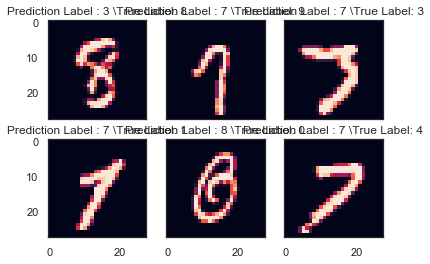

In [121]:
errors = (y_pred_classes - y_true !=0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title('Prediction Label : {} \True Label: {}'.format(pred_errors[error],obs_errors[error]))
            n += 1
            
y_pred_eroors_prob = np.max(y_pred_errors, axis=1)
true_prob_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
delta_pred_true_errors = y_pred_eroors_prob - true_prob_errors
sorted_delta_errors = np.argsort(delta_pred_true_errors)

most_important_errors = sorted_delta_errors[-6:]
display_errors(most_important_errors, X_val_errors, y_pred_classes_errors, y_true_errors)
            

In [122]:
results =model.predict(test)
results = np.argmax(results, axis=1)
results = pd.Series(results, name = 'Label')

In [123]:
Submission = pd.concat([pd.Series(range(1,28001), name = 'ImageId'), results], axis=1)


Submission.to_csv('cnn_mnist_datagen.csv', index =False)

## Data Augmentation

### create more samples by augmenting exisiting training samples


In [114]:
datagen = ImageDataGenerator(
                    featurewise_center=False,
                    samplewise_center=False,
                    featurewise_std_normalization=False,
                    samplewise_std_normalization=False,
                    zca_whitening=False,
                    rotation_range=10,
                    zoom_range=0.1,
                    width_shift_range=0.1, height_shift_range=0.1,
                    horizontal_flip=False, vertical_flip=False)
datagen.fit(X_train)

In [115]:
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/15
 - 279s - loss: 0.4273 - acc: 0.8634 - val_loss: 0.0643 - val_acc: 0.9826
Epoch 2/15
 - 285s - loss: 0.1285 - acc: 0.9611 - val_loss: 0.0772 - val_acc: 0.9805
Epoch 3/15
 - 284s - loss: 0.0940 - acc: 0.9716 - val_loss: 0.0390 - val_acc: 0.9886
Epoch 4/15
 - 299s - loss: 0.0776 - acc: 0.9768 - val_loss: 0.0396 - val_acc: 0.9883
Epoch 5/15
 - 314s - loss: 0.0702 - acc: 0.9796 - val_loss: 0.0353 - val_acc: 0.9890
Epoch 6/15
 - 287s - loss: 0.0662 - acc: 0.9806 - val_loss: 0.0352 - val_acc: 0.9917
Epoch 7/15
 - 292s - loss: 0.0617 - acc: 0.9819 - val_loss: 0.0466 - val_acc: 0.9886
Epoch 8/15
 - 308s - loss: 0.0607 - acc: 0.9819 - val_loss: 0.0396 - val_acc: 0.9881
Epoch 9/15
 - 274s - loss: 0.0570 - acc: 0.9834 - val_loss: 0.0422 - val_acc: 0.9893

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 10/15
 - 268s - loss: 0.0488 - acc: 0.9859 - val_loss: 0.0333 - val_acc: 0.9914
Epoch 11/15
 - 272s - loss: 0.0460 - acc: 0.9869 - val_loss: 0.0283 